In [21]:
import numpy as np
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, dtype = np.str , delimiter='\t')

In [5]:
def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    summation = 0
    U_val = np.linalg.norm(U)
    V_val = np.linalg.norm(V)
    print(len(Y))
    for x in range (len(Y)): 
        j = Y[x][0] - 1
        i = Y[x][1] - 1
        yij = Y[x][2]
        dot = np.dot(U[i], V[j])
        summation += (yij - dot) ** 2
    return ((reg/2) * ((U_val)**2 + (V_val)**2) + (summation/2)/ len(Y))

In [6]:
def get_m(y_train): 
    avg = 0
    for i in y_train: 
        avg += i[2]
    return avg/len(y_train)

In [7]:
# import the data 
# calculate M and N
# set  k = 20

Y_train = load_data('data/train.txt')
Y_test = load_data('data/test.txt')
Y_train = np.array([list(map(int, x)) for x in Y_train])
Y_test = np.array([list(map(int, x)) for x in Y_test])
m = get_m(Y_train)
M = max(max(Y_train[:,0]), max(Y_test[:,0])) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])) # movies

k = 20

print(M)
print(N)



943
1682


In [8]:
# create and fill in Y- matrix
Ymat = np.zeros((N, M))
print(len(Ymat))
for rating in Y_train:
    uid = rating[0]
    mid = rating[1]
    rating = rating[2]
    Ymat[mid - 1][uid - 1] = rating
# Y is matrix of all ratings that users(col) have given to movies(row)
# fill in every empty 0 with the average of the average user id rating
# and the average movie id rating

# find average user id rating for given row
av_uid = []
av_mid = []

for n in range(N):
    nonzeros = 0
    total = 0
    for m in range(M):
        if Ymat[n][m] != 0:
            nonzeros += 1
            total += Ymat[n][m]
    if nonzeros == 0:
        av_mid.append(0)
    else:
        av_mid.append(total/nonzeros)

for m in range(M):
    nonzeros = 0
    total = 0
    for n in range(N):
        if Ymat[n][m] != 0:
            nonzeros += 1
            total += Ymat[n][m]
    if nonzeros == 0:
        av_uid.append(0)
    else:
        av_uid.append(total/nonzeros)
        

for m in range(M):
    for n in range(N):
        if Ymat[n][m] == 0:
            Ymat[n][m] = (av_uid[m] + av_mid[n])/2



1682


In [9]:
print(Ymat)

[[5.         4.         3.30565693 ... 5.         4.07351408 3.61186499]
 [3.         3.43040452 2.93698347 ... 3.58471074 3.70484061 5.        ]
 [4.         3.40006662 2.90664557 ... 3.55437284 3.67450271 3.21285362]
 ...
 [2.8313253  2.86842105 2.375      ... 3.02272727 3.14285714 2.68120805]
 [3.3313253  3.36842105 2.875      ... 3.52272727 3.64285714 3.18120805]
 [3.3313253  3.36842105 2.875      ... 3.52272727 3.64285714 3.18120805]]


In [10]:
# create the model
nmf = NMF(n_components = k, init = 'random', shuffle = True)

In [12]:
U = nmf.fit_transform(Ymat)
V = nmf.components_
print(np.shape(U))
print(np.shape(V))
print(V)

(1682, 20)
(20, 943)
[[5.62202665e-01 1.84083653e-01 2.00594003e-01 ... 2.12187147e-01
  2.93923771e-01 5.87638595e-01]
 [0.00000000e+00 1.72926509e-01 1.78587153e-01 ... 2.03907334e-01
  3.48015446e-01 3.30856408e-01]
 [3.54932778e-04 5.52117380e-01 4.00424227e-01 ... 3.06030450e-01
  3.19240789e-01 4.72243449e-01]
 ...
 [5.30578604e-01 1.22551409e-01 3.48775185e-01 ... 0.00000000e+00
  1.83359696e-01 2.61564901e-01]
 [0.00000000e+00 9.62073666e-02 3.72216610e-01 ... 1.08263155e-01
  2.32400065e-01 5.98212639e-01]
 [2.34716120e-01 2.58747577e-01 3.97149227e-01 ... 1.91502176e-01
  2.20801385e-01 3.02429211e-01]]


In [13]:
len(V)
len(U)
len(Y_train)

90000

In [14]:
# must find the error 
get_err(U, np.transpose(V), Y_train, 0)



90000


0.3529081538102033

In [15]:
get_err(U, np.transpose(V), Y_test, 0)


10000


0.4422433218507587

In [16]:
print(U)


[[0.49446723 0.41900974 0.97951199 ... 0.67673668 0.         0.        ]
 [0.33004365 0.04755696 1.10174952 ... 0.53788545 0.31675952 0.36935394]
 [0.08881387 0.38538358 0.98591293 ... 0.12732823 0.37543164 0.28705573]
 ...
 [0.26345214 0.41908794 0.44099965 ... 0.47883188 0.67021531 0.47294622]
 [0.31142488 0.51459357 0.8636911  ... 0.57617277 0.55274554 0.42587407]
 [0.38733111 0.44154491 1.20962072 ... 0.5288936  0.27930934 0.2565383 ]]


In [17]:
print(V)

[[5.62202665e-01 1.84083653e-01 2.00594003e-01 ... 2.12187147e-01
  2.93923771e-01 5.87638595e-01]
 [0.00000000e+00 1.72926509e-01 1.78587153e-01 ... 2.03907334e-01
  3.48015446e-01 3.30856408e-01]
 [3.54932778e-04 5.52117380e-01 4.00424227e-01 ... 3.06030450e-01
  3.19240789e-01 4.72243449e-01]
 ...
 [5.30578604e-01 1.22551409e-01 3.48775185e-01 ... 0.00000000e+00
  1.83359696e-01 2.61564901e-01]
 [0.00000000e+00 9.62073666e-02 3.72216610e-01 ... 1.08263155e-01
  2.32400065e-01 5.98212639e-01]
 [2.34716120e-01 2.58747577e-01 3.97149227e-01 ... 1.91502176e-01
  2.20801385e-01 3.02429211e-01]]


In [18]:
V = nmf.fit_transform(Ymat)
U = nmf.components_
A, S, B = np.linalg.svd(V, full_matrices = False)
print(np.shape(A))
A = np.transpose(A)
print(np.shape(A))
A_12 = A[:,0:2]
print(np.shape(A_12))
A_12 = np.transpose(A_12)
print(np.shape(A_12))
V_s = np.dot(A_12, np.transpose(V))
U_s = np.dot(A_12, U)

(1682, 20)
(20, 1682)
(20, 2)
(2, 20)


In [19]:
print(np.shape(U_s))
print(np.shape(V_s))

(2, 943)
(2, 1682)


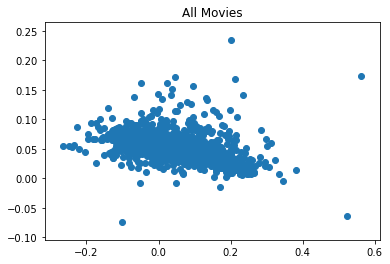

In [22]:
plt.scatter(V_s[0], V_s[1])
plt.title("All Movies")
plt.show()


In [23]:
data = load_data("data/movies.txt")
titles = data[:,0:2]
genres = np.delete(data, 1, axis = 1)

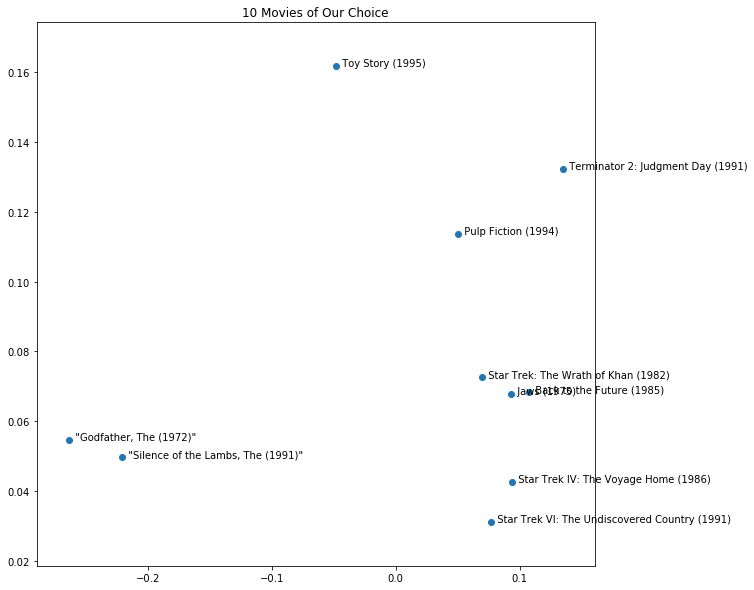

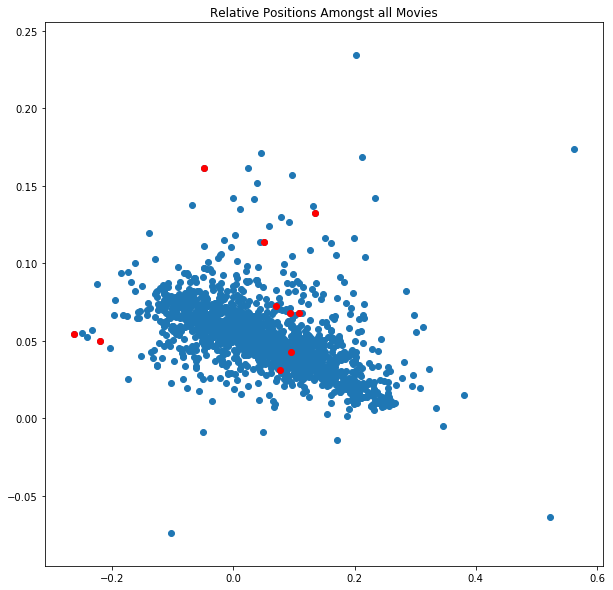

In [24]:
# 10 movies of your choice 
movie_ids = [1, 56, 228, 227, 230, 98, 127, 204, 234, 96]
ten = np.zeros([2, 10])
for j,id in enumerate(movie_ids):
    for i in range(2): 
        ten[i][j] = V_s[i][id - 1]


plt.rcParams["figure.figsize"] = [10,10]

#putting the labels on the points
fig, ax = plt.subplots()
plt.scatter(ten[0], ten[1])
plt.title("10 Movies of Our Choice")



for i, movie_id in enumerate(movie_ids):
    title = str(titles[movie_id - 1][1])
    ax.annotate("  " + title, (ten[0][i], ten[1][i]))
    

plt.show()

#relative positions
plt.scatter(V_s[0], V_s[1])
plt.scatter(ten[0], ten[1], color = "red")
plt.title("Relative Positions Amongst all Movies")
plt.show()

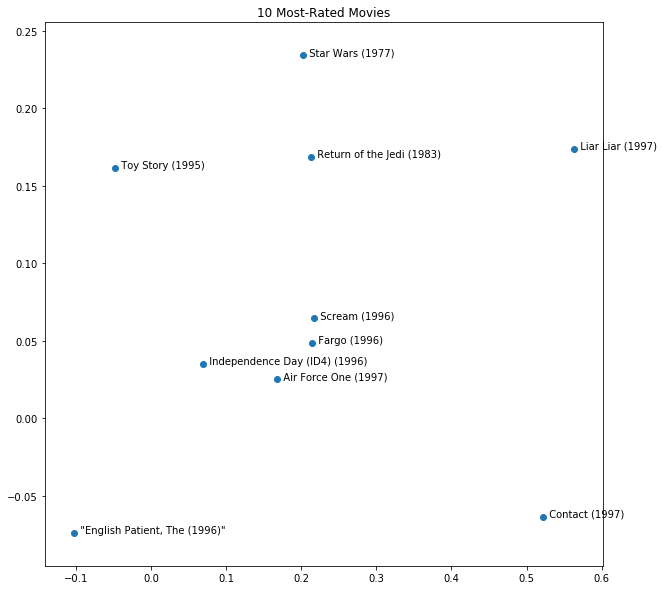

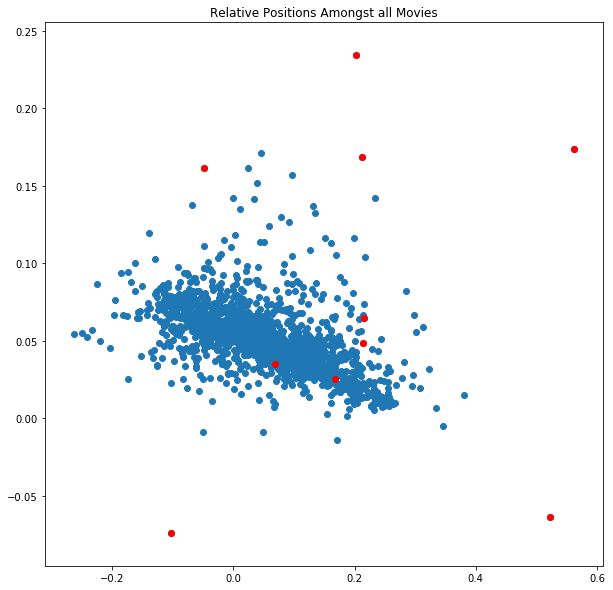

In [25]:
ratings = load_data("data/data.txt")
ratings = ratings.astype(int)
# all ratings of ten most popular movies which recieved the most ratings
x = np.transpose(ratings[:,1])
counts = np.array(np.unique(x, return_counts = True)).T
counts = counts[counts[:,1].argsort()]
popular = counts[-10:,:]

pop = np.zeros([2, 10])
for i in range(2): 
    for j in range(10): 
        pop[i][j] = V_s[i][popular[j][0]-1]

fig, ax = plt.subplots()
plt.scatter(pop[0], pop[1])
plt.title("10 Most-Rated Movies")

movie_ids = np.transpose(popular[:,0]).tolist()

for i, movie_id in enumerate(movie_ids):
    title = str(titles[movie_id - 1][1])
    ax.annotate("  " + title, (pop[0][i], pop[1][i]))

plt.show()

#relative positions
plt.scatter(V_s[0], V_s[1])
plt.scatter(pop[0], pop[1], color = "red")
plt.title("Relative Positions Amongst all Movies")
plt.show()


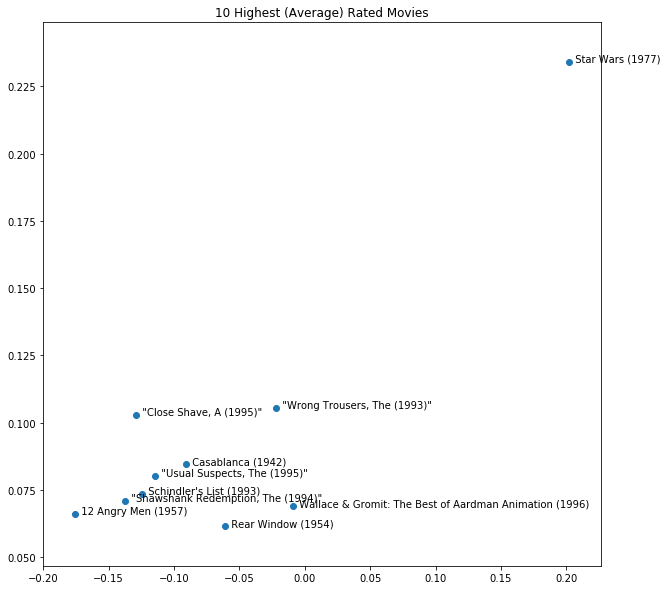

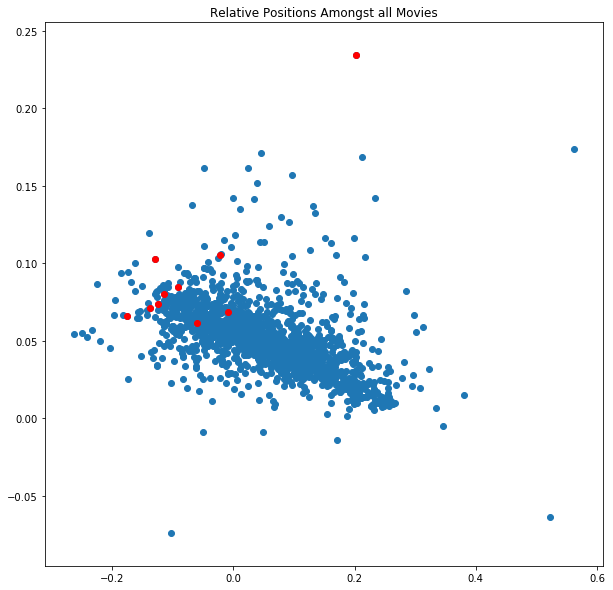

In [26]:
# all ratings of ten best movies with highest average ratings
av = {}
for i in range(len(ratings)):
    name = ratings[i][1]
    if name in av.keys():
        #if the movie already in dictionary
        av[name].append(ratings[i][2])
        
    else:
        av[name] = [ratings[i][2]]

for movie in av.keys():
    #print(str(movie), " ", str(np.mean(av[movie])))
    av[movie] = np.mean(av[movie])

av_movie_ratings = []
for movie_id in av.keys():
    av_movie_ratings.append([movie_id, av[movie_id]])
    
av_movie_ratings = np.asarray(av_movie_ratings)

av_ratings = av_movie_ratings[av_movie_ratings[:,1].argsort()]
av_ratings = av_ratings.tolist()

#get the top 10 with at leat 30 ratings
for i in range(len(av_ratings)):
    id1 = int(av_ratings[i][0])
    #counts is the (id, # of ratings list)
    for j in range(len(counts)):
        id2 = int(counts[j][0])
        if id1 == id2:
            av_ratings[i].append(counts[j][1])
            break
            
av_ratings = (np.asarray(av_ratings))
#noa av_ratings has the counts for that movies as the third column

popular2 = []
j = 1681
while len(popular2) < 10:
    if av_ratings[j][2] >= 30:
        popular2.append([av_ratings[j][0], av_ratings[j][1]])
    j -= 1;

popular2 = np.asarray(popular2)
#print(popular2)

movie_ids = np.transpose(popular2[:,0]).astype(int)
#print(movie_ids)

pop_best = np.zeros([2, 10])
for i in range(2): 
    for j in range(10): 
        pop_best[i][j] = V_s[i][int(popular2[j][0]-1)]

from sklearn.preprocessing import normalize
# norm = np.zeros([2, 10])
# for i in range(2): 
#     for j in range(10): 
#         norm[i][j] = pop_best[i][j]/np.linalg.norm(pop_best)


#print(np.abs(pop_best[0]))
fig, ax = plt.subplots()
plt.scatter(pop_best[0], pop_best[1])
plt.title("10 Highest (Average) Rated Movies")

for i, movie_id in enumerate(movie_ids):
    title = str(titles[int(movie_id) - 1][1])
    #print(title)
    ax.annotate("  " + title, (pop_best[0][i], pop_best[1][i]))

plt.show()

plt.scatter(V_s[0], V_s[1])
plt.scatter(pop_best[0], pop_best[1], color = "red")
plt.title("Relative Positions Amongst all Movies")
plt.show()

In [32]:
# 3 Genres of Movies
# Action Movies
genre_1 = genres[:, 3]
genre_1_movieid = []
rating = []
for i in range(len(genre_1)): 
    if genre_1[i] == '1': 
        genre_1_movieid.append(genres[i][0])
m1 = np.zeros([2, 50])
for i in range(2): 
    for j in range(50): 
        index = genre_1_movieid[j]
        #(int(index))
        m1[i][j] = V_s[i][int(index) - 1 ]

# Animation Movies
genre_2 = genres[:, 5]
genre_2_movieid = []
rating2 = []
for i in range(len(genre_2)): 
    if genre_2[i] == '1' and genres[i][0] not in genre_1_movieid: 
        genre_2_movieid.append(genres[i][0])
m2 = np.zeros([2, 50])
for i in range(2): 
    for j in range(50): 
        index = genre_2_movieid[j]
        m2[i][j] = V_s[i][int(index) - 1]

#Comedy
genre_3 = genres[:, 7]
genre_3_movieid = []
rating3 = []
for i in range(len(genre_3)): 
    if genre_3[i] == '1' and genres[i][0] not in genre_1_movieid and genres[i][0] not in genre_2_movieid: 
        genre_3_movieid.append(genres[i][0])
m3 = np.zeros([2, 50])
for i in range(2): 
    for j in range(50): 
        index = genre_3_movieid[j]
        m3[i][j] = V_s[i][int(index) - 1]
movie_ids1 = genre_1_movieid[:30]
movie_ids2 = genre_2_movieid[:30]
movie_ids3 = genre_3_movieid[:30]


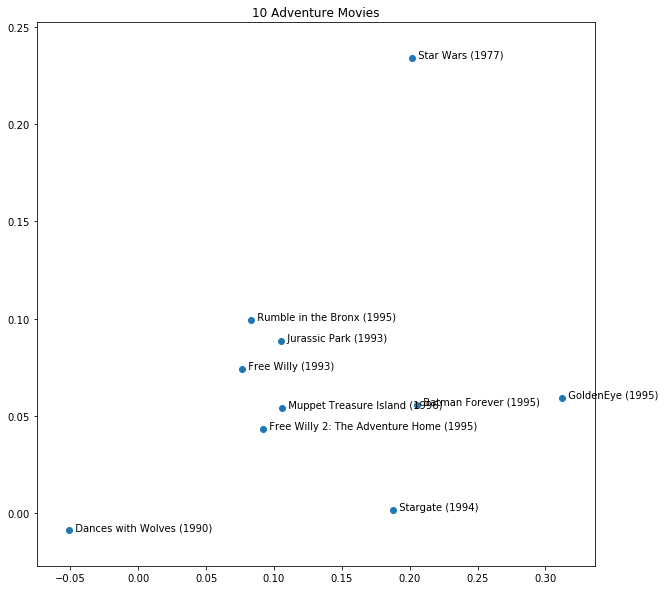

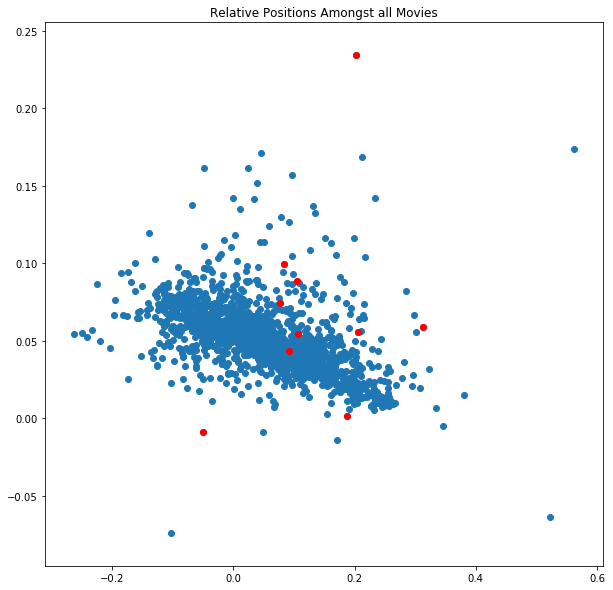

In [33]:
# Adventure Movies
# -1.4 0 
# -1.25 -.25
    
movie_ids = movie_ids1[:10]
m1 = m1[:, :10]
fig, ax1 = plt.subplots()
plt.scatter(m1[0], m1[1])
plt.title("10 Adventure Movies")

#annotate with movie names
for i, movie_id in enumerate(movie_ids):
    title = str(titles[int(movie_id) - 1][1])
    ax1.annotate("  " + title, (m1[0][i], m1[1][i]))

plt.show()

plt.scatter(V_s[0], V_s[1])
plt.scatter(m1[0], m1[1], color = "red")
plt.title("Relative Positions Amongst all Movies")
plt.show()

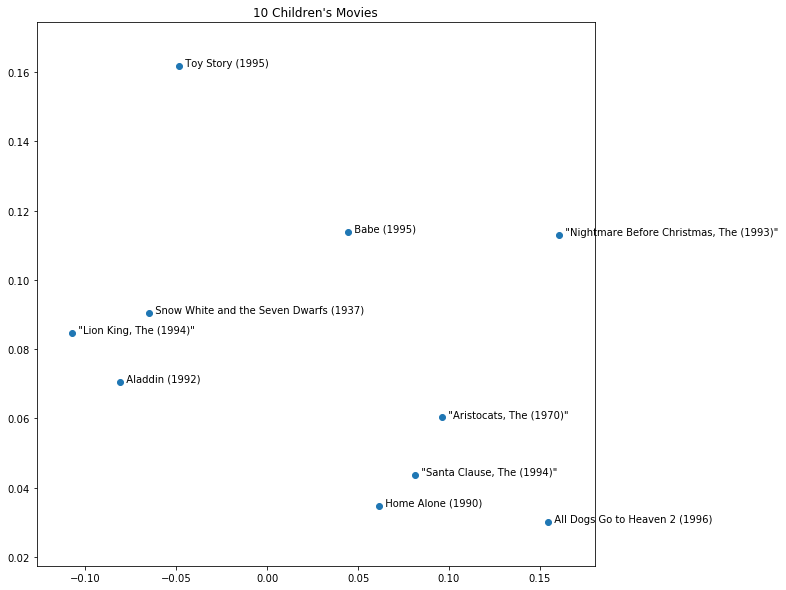

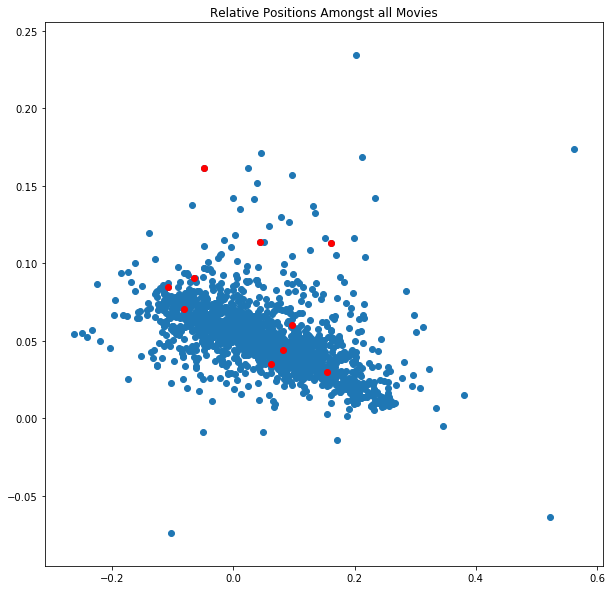

In [34]:
# Children's Movies
# -1.4 0 
# -1.25 -.25

        
movie_ids = movie_ids2[:10]
m2 = m2[:,:10]

#print(len(m2))
fig, ax1 = plt.subplots()
plt.scatter(m2[0], m2[1])
plt.title("10 Children's Movies")

#annotate with movie names
for i, movie_id in enumerate(movie_ids):
    title = str(titles[int(movie_id) - 1][1])
    ax1.annotate("  " + title, (m2[0][i], m2[1][i]))

plt.show()

plt.scatter(V_s[0], V_s[1])
plt.scatter(m2[0], m2[1], color = "red")
plt.title("Relative Positions Amongst all Movies")
plt.show()

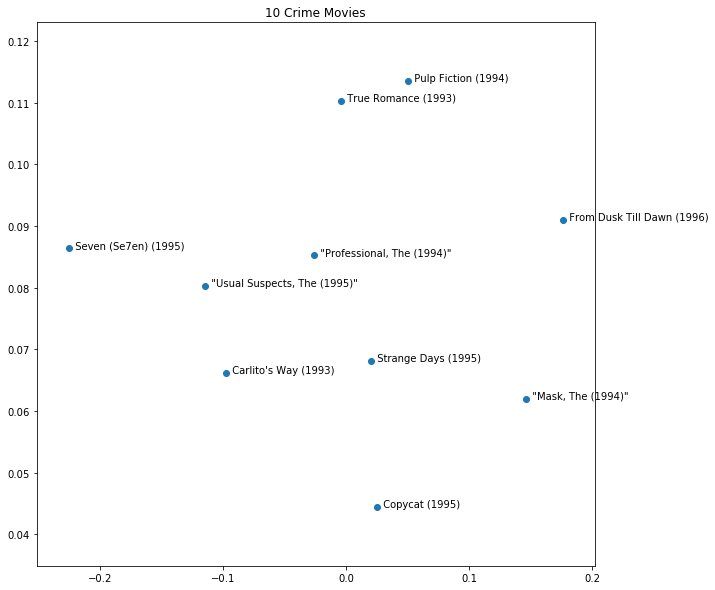

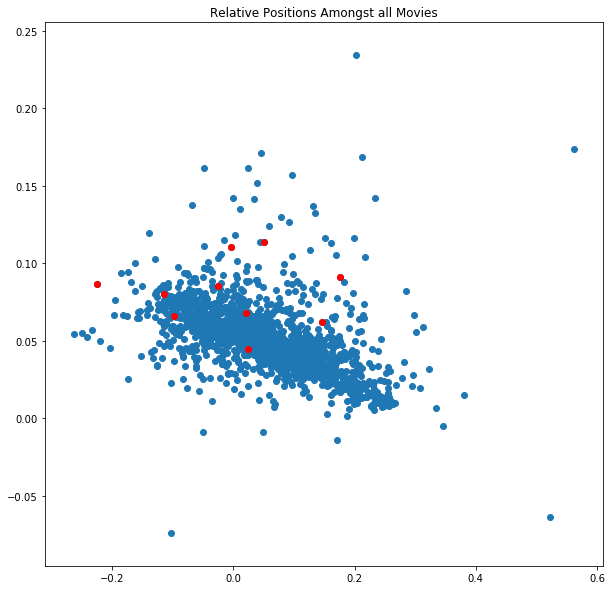

In [35]:

# Crime
movie_ids = movie_ids3[:10]
m3 = m3[:,:10]

fig, ax1 = plt.subplots()
plt.scatter(m3[0], m3[1])
plt.title("10 Crime Movies")

for i, movie_id in enumerate(movie_ids):
    title = str(titles[int(movie_id) - 1][1])
    ax1.annotate("  " + title, (m3[0][i], m3[1][i]))
plt.show()

#reltive pos
plt.scatter(V_s[0], V_s[1])
plt.scatter(m3[0], m3[1], color = "red")
plt.title("Relative Positions Amongst all Movies")
plt.show()

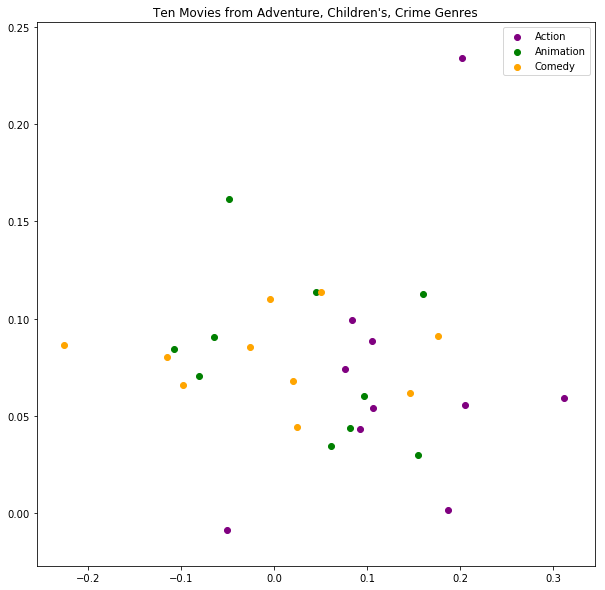

In [36]:
plt.scatter(m1[0], m1[1], color = "purple")
plt.scatter(m2[0], m2[1], color = "green")
plt.scatter(m3[0], m3[1], color = "orange")
plt.legend(["Action", "Animation", 'Comedy'])
plt.title("Ten Movies from Adventure, Children's, Crime Genres")
plt.show()